In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X = data.drop(columns=['label'])
y = data['label']

(42000,)

In [8]:
X2 = X.values.reshape(-1,28,28,1)
X2.shape

(42000, 28, 28, 1)

Index 12936
Actual label 2


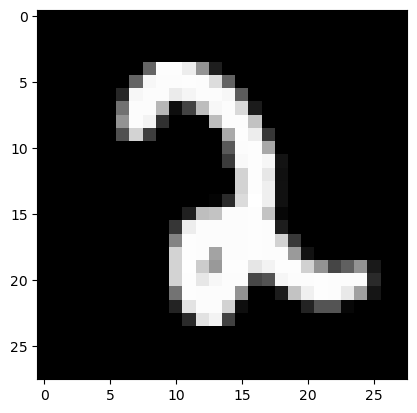

In [30]:
from random import randrange
index= randrange(42000)

plt.imshow(X2[index],cmap='gray')
print("Index "+str(index))
print("Actual label "+str(y[index]))


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

model.fit(X_train,y_train)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = model.predict(X_test)

accuracy_score = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)

print("Classification report "+ report)
print("Accuracy report "+ str(accuracy_score))

Classification report               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1242
           1       0.95      0.98      0.96      1424
           2       0.91      0.88      0.90      1199
           3       0.89      0.89      0.89      1296
           4       0.93      0.91      0.92      1204
           5       0.88      0.84      0.86      1178
           6       0.93      0.96      0.94      1250
           7       0.94      0.92      0.93      1284
           8       0.85      0.86      0.86      1236
           9       0.88      0.91      0.89      1287

    accuracy                           0.91     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.91      0.91      0.91     12600

Accuracy report 0.9111111111111111


Label for the Image 8
Machine predicted value 1


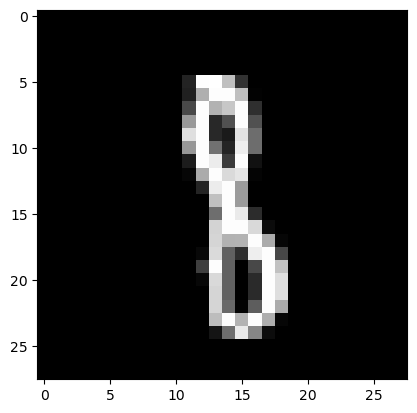

In [69]:
from random import randrange
X_test2 = X_test.values.reshape(-1,28,28,1)
test_index = randrange(4200)

print("Label for the Image "+str(y_test.iloc[test_index]))
print("Machine predicted value " +str(y_pred[test_index]))

plt.imshow(X_test2[test_index],cmap='gray')

<Axes: >

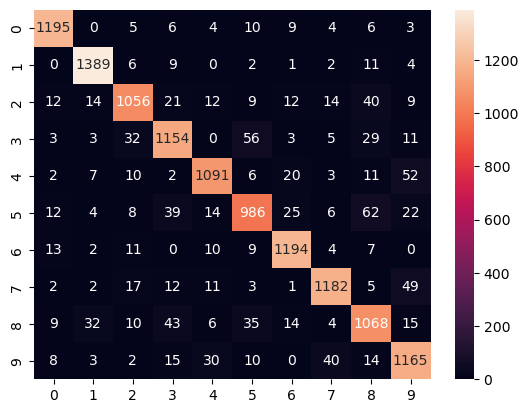

In [90]:
matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data=matrix,annot=True,fmt='d')